In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors

In [2]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

In [3]:
home_folder = '/nethome/manra003/analysis/dispersion/simulations/'

# ds3D=xr.open_zarr(home_folder+'Fwd_3D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')
# ds2D=xr.open_zarr(home_folder+'Fwd_2D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')
# dsdvm=xr.open_zarr(home_folder+'Fwd_DVM_Luderitz_117x117_Nov01-31_2017_1z_100days.zarr')
# ds2D = xr.open_zarr(home_folder + "Fwd_2D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")
# ds3D = xr.open_zarr(home_folder + "Fwd_3D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")  
# dsdvm = xr.open_zarr(home_folder + "Fwd_DVM_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 

ds2D = xr.open_zarr(home_folder + "08Aug2023_2D_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr")
ds3D = xr.open_zarr(home_folder + "08Aug2023_3D_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr")  
dsdvm = xr.open_zarr(home_folder + "08Aug2023_DVM_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr") 
dsbp = xr.open_zarr(home_folder + "08Aug2023_3D_BP_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr") 

In [4]:
# OLD- Particles are getting deleted due to model indexing in the fieldset- expanded the fieldset. 
# need to avoid deletion to compute reliable CDF (pre 08-08-2023 simulation)
ds2D.lat[1020,:].values  

array([-30.2       , -30.09946036, -29.97157043, -29.82111922,
       -29.66024389, -29.48238574, -29.29036694, -29.0978138 ,
       -28.93659706, -28.8968628 , -28.93603263, -29.02183752,
       -29.1455534 , -29.28660588, -29.44403356, -29.61354178,
       -29.79821674, -29.98587527, -30.16243023, -30.31118229,
       -30.4187237 , -30.48889757, -30.53139939, -30.55997102,
       -30.56882268, -30.57605285, -30.56580265, -30.54013061,
       -30.51613871, -30.48211226, -30.4279225 , -30.32989047,
       -30.27936499, -30.23730836, -30.18347171, -30.1253541 ,
       -30.06892579, -30.0034305 , -29.93493999, -29.91756375,
       -29.90987611, -29.89208238, -29.85915371, -29.83813684,
       -29.80188786, -29.76568943, -29.76675745, -29.77899027,
       -29.79890538, -29.82682776, -29.8620222 , -29.89619303,
       -29.92049908, -29.94891824, -29.98905758, -30.05744666,
       -30.14533391, -30.23285194, -30.3112079 , -30.37093775,
       -30.41151914, -30.44651915, -30.47515936, -30.47

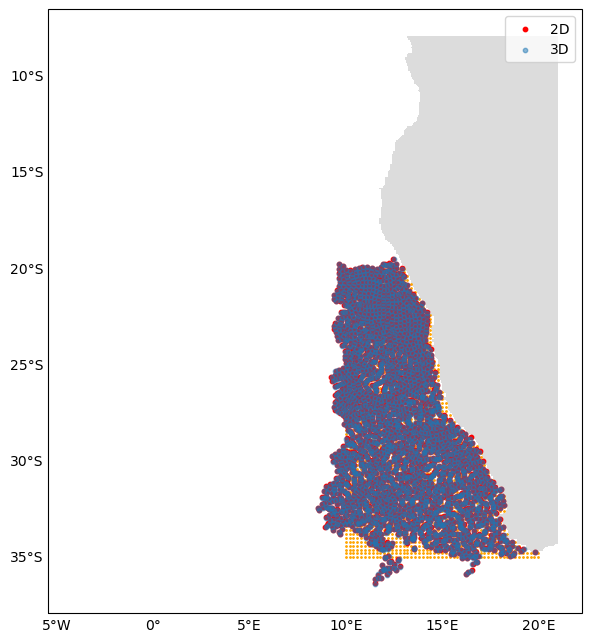

In [5]:
custom_size=10
fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
# ax.set_xlim(8,18)
# ax.set_ylim(-30,-20)
# ax.set_xlim(10,16)
# ax.set_ylim(-30,-21)
t_step=5
n=50000
# ax.scatter(ds2D['lon'][:,t_step], ds2D['lat'][:,t_step], s=1, c='red', label="2D")
# ax.scatter(ds3D['lon'][:,t_step], ds3D['lat'][:,t_step], s=0.1, alpha=0.5, label="3D")
ax.scatter(ds3D['lon'][:n,0], ds3D['lat'][:n,0], s=1, c='orange')
ax.scatter(ds2D['lon'][:n,t_step], ds2D['lat'][:n,t_step], s=10, c='red', label="2D")
ax.scatter(ds3D['lon'][:n,t_step], ds3D['lat'][:n,t_step], s=10, alpha=0.5, label="3D")
ax.legend()
plt.show()

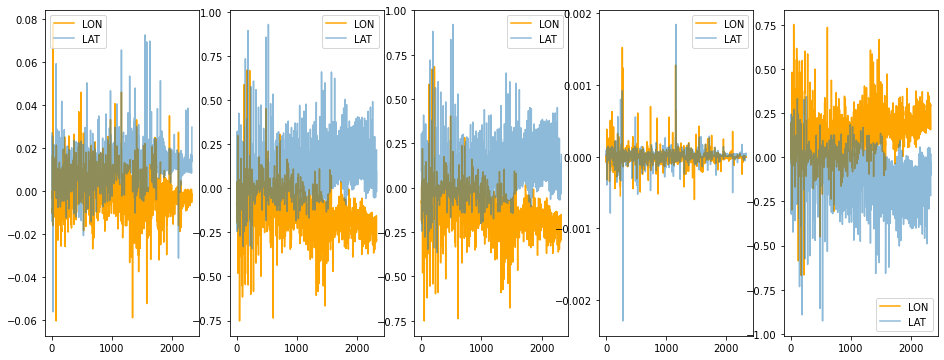

In [6]:
fig, ax= plt.subplots(ncols=5,nrows=1, figsize=(16,6))

ax[0].plot(ds2D['lon'][:, t_step]-ds3D['lon'][:, t_step], c='orange', label="LON")
ax[0].plot(ds2D['lat'][:, t_step]-ds3D['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[0].legend()
ax[1].plot(ds2D['lon'][:, t_step]-dsdvm['lon'][:, t_step], c='orange', label="LON")
ax[1].plot(ds2D['lat'][:, t_step]-dsdvm['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[1].legend()

ax[2].plot(ds3D['lon'][:, t_step]-dsdvm['lon'][:, t_step], c='orange', label="LON")
ax[2].plot(ds3D['lat'][:, t_step]-dsdvm['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[2].legend()

ax[3].plot(ds2D['lon'][:, t_step]-dsbp['lon'][:, t_step], c='orange', label="LON")
ax[3].plot(ds2D['lat'][:, t_step]-dsbp['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[3].legend()

ax[4].plot(dsdvm['lon'][:, t_step]-dsbp['lon'][:, t_step], c='orange', label="LON")
ax[4].plot(dsdvm['lat'][:, t_step]-dsbp['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[4].legend()



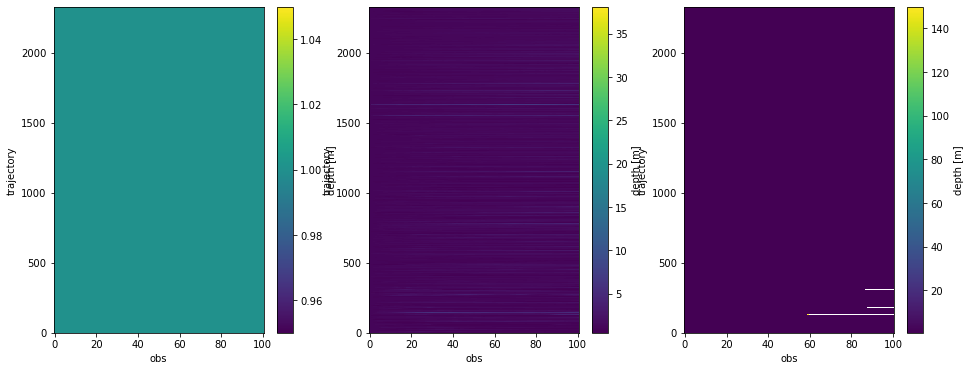

In [7]:
fig, ax= plt.subplots(ncols=3,nrows=1, figsize=(16,6))
ds2D.z.plot(ax=ax[0])

ds3D.z.plot(ax=ax[1])
dsdvm.z.plot(ax=ax[2])

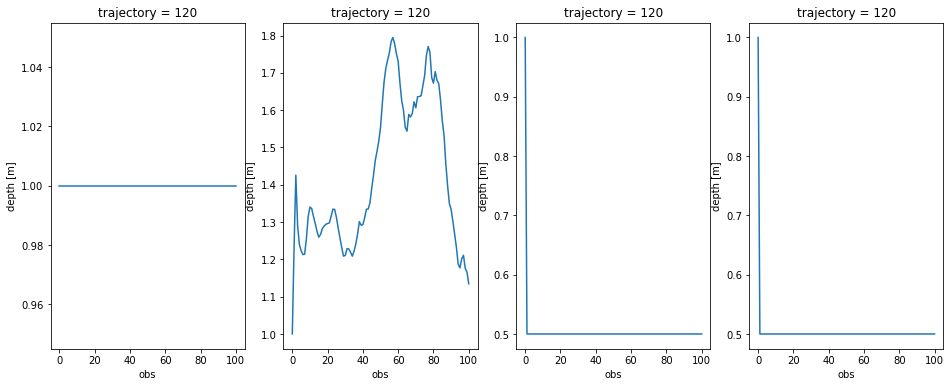

In [8]:
id = 120

fig, ax= plt.subplots(ncols=4,nrows=1, figsize=(16,6))

ds2D.z[id,:].plot(ax=ax[0])
ds3D.z[id,:].plot(ax=ax[1])
dsdvm.z[id,:].plot(ax=ax[2])
dsbp.z[id,:].plot(ax=ax[3])



In [9]:
dsdvm.z[id,].values, dsdvm.time[id,].values

(array([1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array(['2017-12-01T00:00:00.000000000', '2017-12-02T00:00:00.000000000',
        '2017-12-03T00:00:00.000000000', '2017-12-04T00:00:00.000000000',
        '2017-12-05T00:00:00.000000000', '2017-12-06T00:00:00.000000000',
        '2017-12-07T00:00:00.000000000', '2017-12-08T00:00:00.000000000',
        '2017-12-09T00:00:00.000000000', '2017-12-10T00:00:00.000000000',
        '2017-12-11T00:00:00.000000000', '2017-12-12T00:00: